# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_columns", 100)

DATA_IN = Path("../data/processed/ko_cleaned.parquet")
df = pd.read_parquet(DATA_IN).copy()

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date").reset_index(drop=True)

df.head()


,Date,close,daily_ret,log_ret
0,2000-01-03,13.815726,NaN,NaN
1,2000-01-04,13.831048,0.001109,0.001108
2,2000-01-05,13.953581,0.008859,0.008820
3,2000-01-06,13.968897,0.001098,0.001097
4,2000-01-07,14.887897,0.065789,0.063715


## 1) First look

In [8]:
print("Shape:", df.shape)
display(df.dtypes.to_frame("dtype"))
df.info()
missing = df.isna().sum().sort_values(ascending=False)
dup_rows = df.duplicated().sum()
display(missing.to_frame("missing_count"))
print("Duplicate rows:", dup_rows)

Shape: (6448, 4)


,dtype
Date,datetime64[ns]
close,float64
daily_ret,float64
log_ret,float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6448 non-null   datetime64[ns]
 1   close      6448 non-null   float64       
 2   daily_ret  6447 non-null   float64       
 3   log_ret    6447 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 201.6 KB


,missing_count
log_ret,1
daily_ret,1
close,0
Date,0


Duplicate rows: 0


## 2) Numeric profile

In [10]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols and c != "Date"]
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

desc = df[num_cols].describe().T
display(desc)



Numeric: ['close', 'daily_ret', 'log_ret']
Categorical: []


,count,mean,std,min,25%,50%,75%,max
close,6448.0,28.761328,16.758378,9.563467,13.570219,25.504409,38.780665,73.378281
daily_ret,6447.0,0.000336,0.012873,-0.100610,-0.005481,0.000447,0.006213,0.138795
log_ret,6447.0,0.000253,0.012878,-0.106038,-0.005496,0.000447,0.006194,0.129971


## 3) Distributions (TODO: add at least 3)

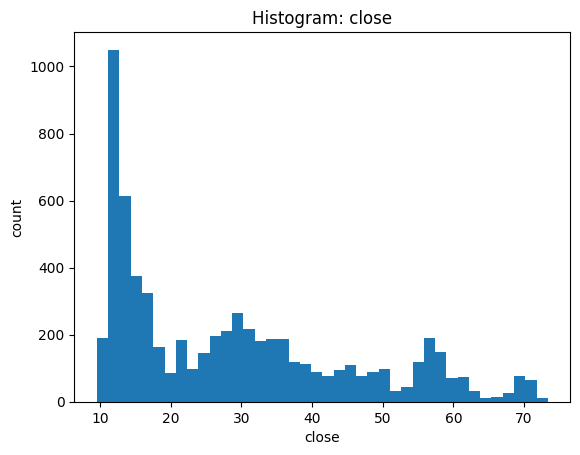

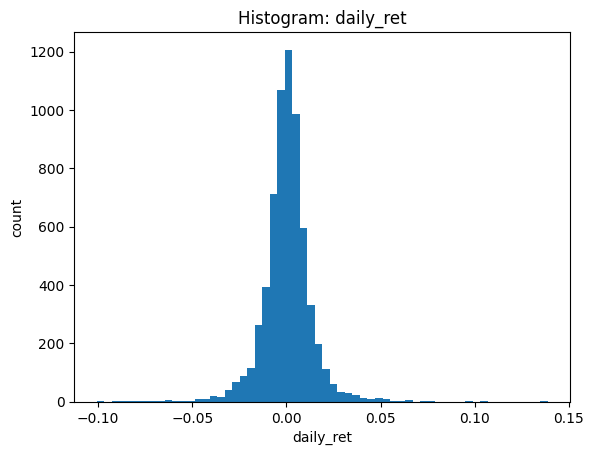

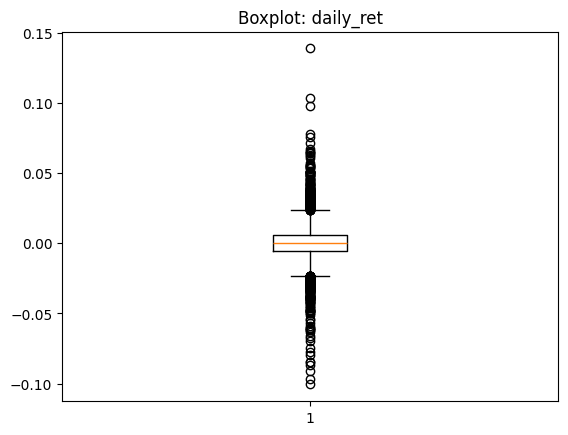

In [11]:
plt.figure()
plt.hist(df["close"].dropna(), bins=40)
plt.title("Histogram: close")
plt.xlabel("close"); plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(df["daily_ret"].dropna(), bins=60)
plt.title("Histogram: daily_ret")
plt.xlabel("daily_ret"); plt.ylabel("count")
plt.show()

plt.figure()
plt.boxplot(df["daily_ret"].dropna())
plt.title("Boxplot: daily_ret")
plt.show()


## 4) Relationships (TODO: add at least 2)

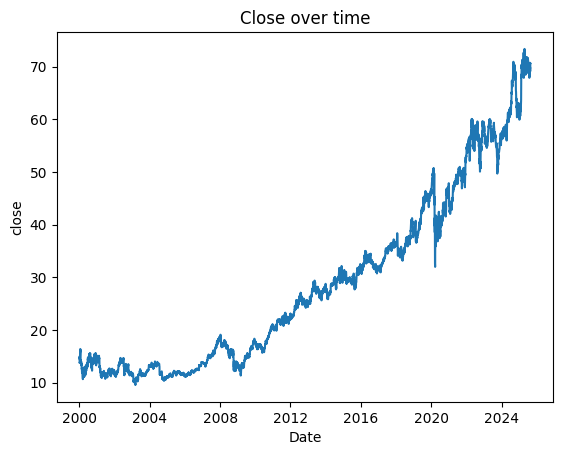

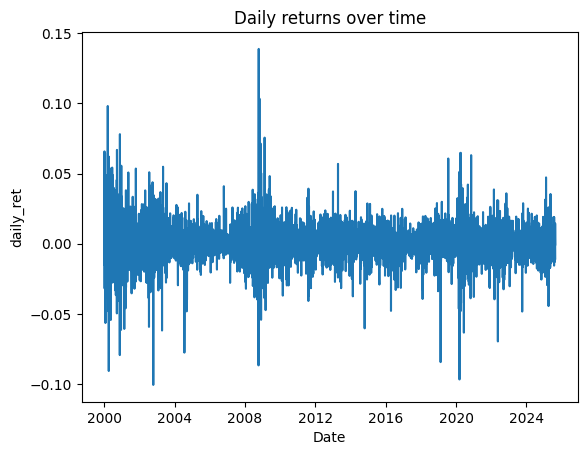

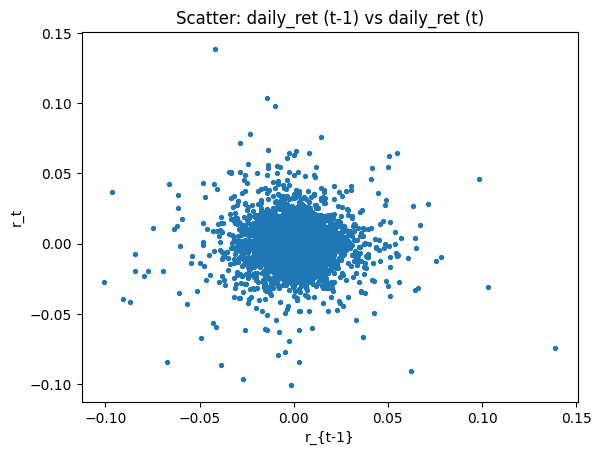

In [12]:
if "Date" in df.columns:
    plt.figure()
    plt.plot(df["Date"], df["close"])
    plt.title("Close over time")
    plt.xlabel("Date"); plt.ylabel("close")
    plt.show()

if "Date" in df.columns:
    plt.figure()
    plt.plot(df["Date"], df["daily_ret"])
    plt.title("Daily returns over time")
    plt.xlabel("Date"); plt.ylabel("daily_ret")
    plt.show()

ret = df["daily_ret"].dropna().to_numpy()
if ret.size > 2:
    r_t   = ret[1:]
    r_lag = ret[:-1]
    plt.figure()
    plt.scatter(r_lag, r_t, s=8)
    plt.title("Scatter: daily_ret (t-1) vs daily_ret (t)")
    plt.xlabel("r_{t-1}"); plt.ylabel("r_t")
    plt.show()


## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)

Top 3 Insights

Price growth trend: The closing price of the stock has shown an upward trajectory since 2000, with periods of volatility (notably around 2008 and 2020). This long-term growth trend suggests overall value increase but also confirms that there were shocks along the way.

Return distribution: Daily returns are centered very close to zero with a sharp peak, as expected for financial returns. However, the boxplot shows clear outliers on both the positive and negative side, reflecting occasional extreme moves in the stock price.

Volatility clustering: The time series of daily returns shows periods where large fluctuations happen in clusters (e.g., 2008 crisis, 2020 COVID). This indicates that volatility is not constant but changes over time, a common feature in financial time series.

Assumptions & Risks:

I assumed that missing values are negligible and do not significantly affect the analysis.

Outliers are considered part of the financial reality rather than data errors; removing them might distort true risk characteristics.

I assume that daily returns are independent across time, but the scatterplot shows volatility clustering, which may challenge this assumption.

Next steps before modeling:

Decide on whether to winsorize or filter extreme returns depending on modeling goals (risk-adjusted returns vs. raw market behavior).

Feature engineering could include rolling volatility or moving averages to capture market structure and better support predictive tasks.

